<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Classification-and-Feature-Selection-(Feature-Importance)" data-toc-modified-id="Classification-and-Feature-Selection-(Feature-Importance)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Classification and Feature Selection (Feature Importance)</a></span></li><li><span><a href="#Classification-and-Feature-Extraction-(PCA)" data-toc-modified-id="Classification-and-Feature-Extraction-(PCA)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Classification and Feature Extraction (PCA)</a></span></li></ul></li><li><span><a href="#Further-Developments" data-toc-modified-id="Further-Developments-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Further Developments</a></span></li></ul></div>

# ARM Data Science Challenge

In this notebook, I will analyse and combine two different datasets provided by ARM. <br>


Summaries of the findings will be provided in bullet points throughout the notebook. At the end of the notebook are provided ideas for further developments and links to some articles and project I published about the proposed topics. Additionally, it could have been possible to make interactive the charts included in this work using the Plotly library instead of Seaborn and Matplotlib, but these would have not been possible to be correctly visualized in a Markdown/PDF format. Some example of interactive charts I created are available [here](https://pierpaolo28.github.io/Projects/project11.html). <br>

If you are visualizing this notebook using Jupyter, it is possible to Hide/Show the code using the button below.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

In [2]:
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

## Data Preprocessing

- I will first start be loading the two datasets and merge them on the **TestId** column to create the final dataset. Finally, will be checked if the dataset has any missing value.

In [3]:
df1 = pd.read_csv('TestInfo.csv')
pd.options.display.max_columns = None
print(df1.shape)
df1.head()

(47, 5)


,TestId,Device,CPUFrequency (MHz),Threads,MLNetwork
0,17,Device_0,1000,5,AlexNet
1,16,Device_0,1000,5,AlexNet
2,39,Device_1,1000,3,AlexNet
3,31,Device_0,1000,5,AlexNet
4,30,Device_0,1000,4,AlexNet


In [4]:
df2 = pd.read_pickle('TestResults.pickle')
print(df2.shape)
df2.head()

(47, 5)


,TestId,Build,Optimised,Time (ms),PeakMemory (MB)
0,33,10,N,125.0,307
1,43,10,Y,50.0,50
2,36,10,N,50.0,458
3,1,2,N,64.0,451
4,16,8,N,104.0,453


In [5]:
df = pd.merge(df1, df2, on='TestId')
print(df.shape)
df.head()

(47, 9)


,TestId,Device,CPUFrequency (MHz),Threads,MLNetwork,Build,Optimised,Time (ms),PeakMemory (MB)
0,17,Device_0,1000,5,AlexNet,9,N,102.000000,449
1,16,Device_0,1000,5,AlexNet,8,N,104.000000,453
2,39,Device_1,1000,3,AlexNet,10,N,333.333333,302
3,31,Device_0,1000,5,AlexNet,10,N,100.000000,449
4,30,Device_0,1000,4,AlexNet,10,N,125.000000,450


In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
TestId,0.0
Device,0.0
CPUFrequency (MHz),0.0
Threads,0.0
MLNetwork,0.0
Build,0.0
Optimised,0.0
Time (ms),0.0
PeakMemory (MB),0.0


## Data Visualization

- Using Seaborn **pairplot** it is possible to visualise the distributions of some of the main features in the dataset (just the numerical features, not the categorical ones).

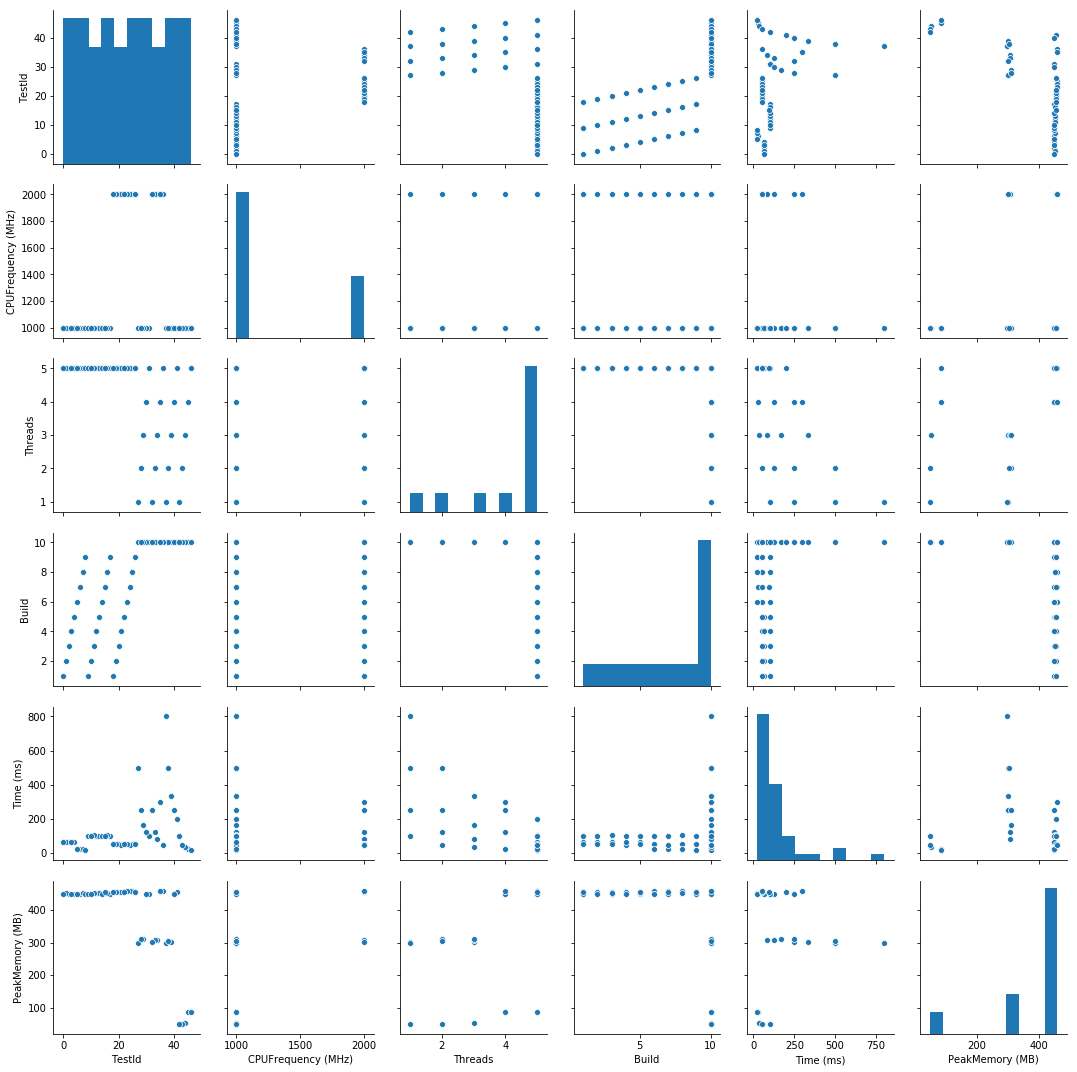

In [7]:
sns.pairplot(df)

- As shown below, we can see that just two devices are taken into consideration in the final dataset (**Device_0 and Device_1**). Device_0 compose 89.3% of the devices in the dataset (42 devices in total) and the other 10.7% (5 devices in total) is instead taken by Device_1.

Device_0    42
Device_1     5
Name: Device, dtype: int64

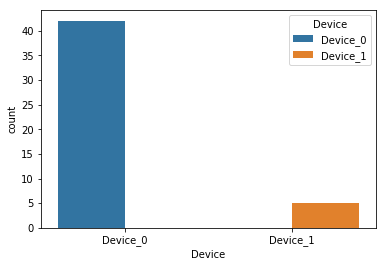

In [8]:
sns.countplot(x = 'Device',data = df,hue = 'Device')
df['Device'].value_counts()

- Two Machine Learning Neural Networks (AlexNet and MobileNet) have been used in either of the two devices in the dataset. In both cases, AlexNet and MobileNet are two types of Convolutional Neural Networks which are commonly used in [mobile and embedded applications](https://www.freecodecamp.org/news/machine-learning-for-mobile-and-embedded-devices/). As can be seen from the figure below, about 70% of the devices in the dataset is using AlexNet as ML Network.

AlexNet      33
MobileNet    14
Name: MLNetwork, dtype: int64

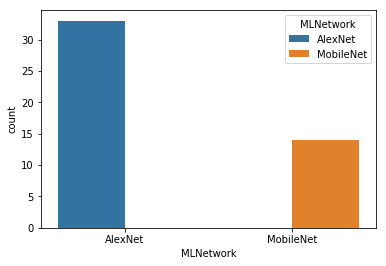

In [9]:
sns.countplot(x = 'MLNetwork',data = df,hue = 'MLNetwork')
df['MLNetwork'].value_counts()

- Going deeper into our Data Visualization analysis, we can then see that all the type of Device_1 uses AlexNet while Device_0 types use either AlexNet or MobileNet (although still the majority of Device_0 uses AlexNet).

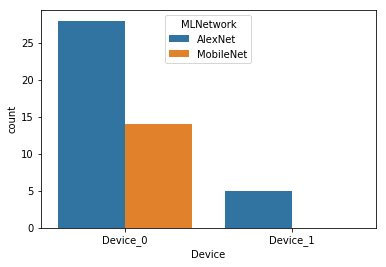

In [10]:
sns.countplot(x = 'Device',data = df,hue = 'MLNetwork')

- From the chart below we now find out that about 80% of the examined devices in the dataset is not optimised.

N    38
Y     9
Name: Optimised, dtype: int64

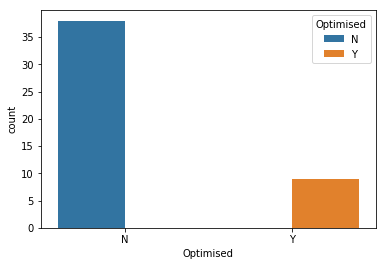

In [11]:
sns.countplot(x = 'Optimised',data = df,hue = 'Optimised')
df['Optimised'].value_counts()

- Taking a look deeper into this, we can now see that none of Device_1 is optimised while some of the Device_0 are instead optimised (about 20% of all the devices in the dataset are optimised and of this 20% they all fall into the Device_0 category). 

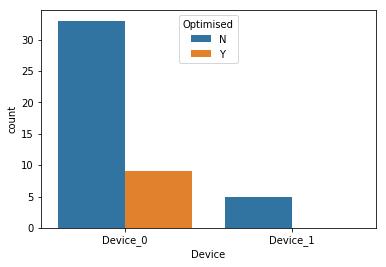

In [12]:
sns.countplot(x = 'Device',data = df,hue = 'Optimised')

- Using a Correlation Matrix, we can now examine the overall correlation between the different features in the dataset.

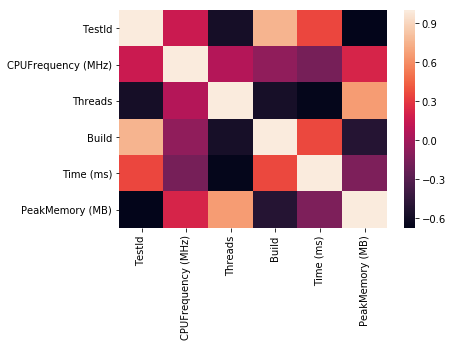

In [13]:
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Machine Learning

- Finally, we can now use Machine Learning to see what accuracy we can achieve when trying to making predictions on any of the features in the considered dataset. For this example, I will try to make predictions (in turn) on the following features:
    - Device	
    - CPUFrequency (MHz)
    - Threads
    - MLNetwork		
    - Optimised	

    To do so, I will make use of a 70%:30% train/test split and I will make use of a Random Forest and Support Vector Machines classifier. If you are looking for a more detailed explaination about Support Vector Machines (SVM), you can find more information [here in this article I wrote.](https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c) <br>

    Two different approaches will now be considered: 
    - In first one our two models will be trained using all the considered features and a Feature Importance plot will be created in each case to examine which Features our Random Forest Classifier gave more weight when making its predictions.
    - In the second approach, I will instead use Principal Component Analysis (PCA) to first reduce our original dataset into two dimension (to observe how much of the original variance of the data can be retained) and then use our Random Forest Classifier. Additionally, a decision boundary plot has been created for each of the considered cases to examine how our classifier is making its decisions.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from itertools import product

### Classification and Feature Selection (Feature Importance)

Predicting Device
Using Random Forest Classifier
[[12  0]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.00      0.00      0.00         3

   micro avg       0.80      0.80      0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15

Classification Feature Importance


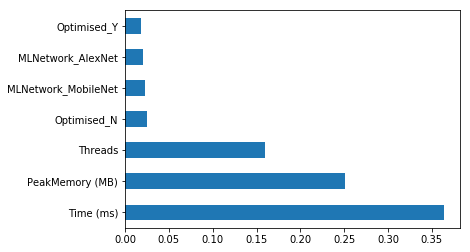

Using Support Vector Machines
[[12  0]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.33      0.50         3

   micro avg       0.87      0.87      0.87        15
   macro avg       0.93      0.67      0.71        15
weighted avg       0.89      0.87      0.84        15

Predicting CPUFrequency (MHz)
Using Random Forest Classifier
[[9 0]
 [2 4]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.67      0.80         6

   micro avg       0.87      0.87      0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15

Classification Feature Importance


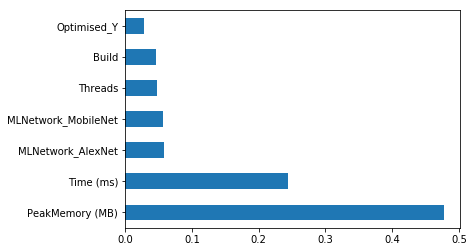

Using Support Vector Machines
[[9 0]
 [2 4]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.67      0.80         6

   micro avg       0.87      0.87      0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15

Predicting Threads
Using Random Forest Classifier
[[0 2 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 1]
 [0 0 1 0 9]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.90      0.90      0.90        10

   micro avg       0.60      0.60      0.60        15
   macro avg       0.18      0.18      0.18        15
weighted avg       0.60      0.60      0.60        15

Classification Feature 

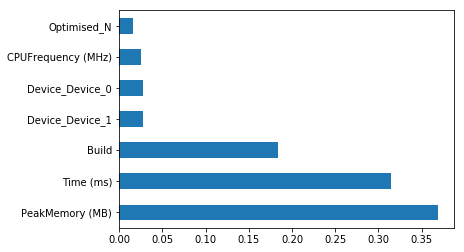

Using Support Vector Machines
[[1 1 0 0 0]
 [0 0 0 0 0]
 [0 1 0 0 0]
 [1 0 1 0 0]
 [0 0 1 0 9]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       1.00      0.90      0.95        10

   micro avg       0.67      0.67      0.67        15
   macro avg       0.30      0.28      0.29        15
weighted avg       0.73      0.67      0.70        15

Predicting MLNetwork
Using Random Forest Classifier
[[13  0]
 [ 0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Classification Fe

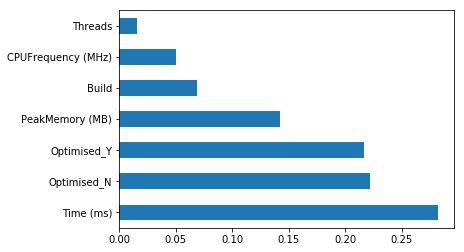

Using Support Vector Machines
[[13  0]
 [ 1  1]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.50      0.67         2

   micro avg       0.93      0.93      0.93        15
   macro avg       0.96      0.75      0.81        15
weighted avg       0.94      0.93      0.92        15

Predicting Optimised
Using Random Forest Classifier
[[15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Classification Feature Importance


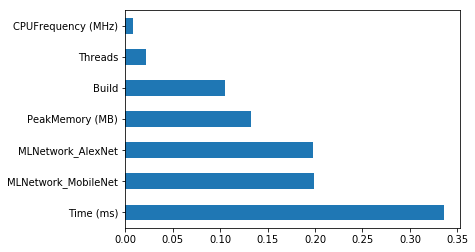

Using Support Vector Machines
[[15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [15]:
labels = df.drop(['TestId', 'Build', 'Time (ms)', 'PeakMemory (MB)'], axis = 1).columns
for i in labels:
    print("Predicting", i)
    X = df.drop(['TestId',i], axis = 1)
    Y = df[i]

    X = pd.get_dummies(X, prefix_sep='_')
    Y = LabelEncoder().fit_transform(Y)

    X2 = StandardScaler().fit_transform(X.values)
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30, random_state = 101)
    
    print("Using Random Forest Classifier")
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))
    
    print("Classification Feature Importance")
    feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
    feat_importances.nlargest(7).plot(kind='barh')
    plt.show()
    
    print("Using Support Vector Machines")
    trainedsvm = svm.LinearSVC().fit(X_Train, Y_Train)
    predictionsvm = trainedsvm.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionsvm))
    print(classification_report(Y_Test,predictionsvm))

### Classification and Feature Extraction (PCA)

Predicting Device
Using PCA and Random Forest Classifier to visualize decision boundary in 2D and test accuracy
[[12  0]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       0.00      0.00      0.00         3

   micro avg       0.80      0.80      0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15



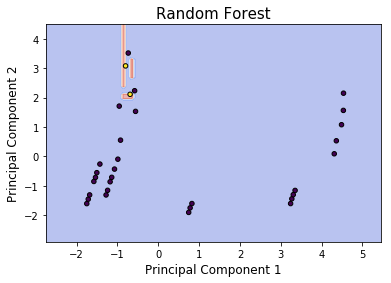

Predicting CPUFrequency (MHz)
Using PCA and Random Forest Classifier to visualize decision boundary in 2D and test accuracy
[[9 0]
 [2 4]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.67      0.80         6

   micro avg       0.87      0.87      0.87        15
   macro avg       0.91      0.83      0.85        15
weighted avg       0.89      0.87      0.86        15



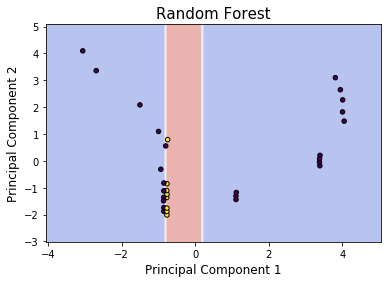

Predicting Threads
Using PCA and Random Forest Classifier to visualize decision boundary in 2D and test accuracy
[[0 1 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 1]
 [0 0 1 0 9]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.75      0.90      0.82        10

   micro avg       0.60      0.60      0.60        15
   macro avg       0.15      0.18      0.16        15
weighted avg       0.50      0.60      0.55        15



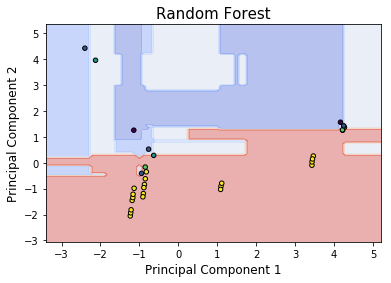

Predicting MLNetwork
Using PCA and Random Forest Classifier to visualize decision boundary in 2D and test accuracy
[[13  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.00      0.00      0.00         2

   micro avg       0.87      0.87      0.87        15
   macro avg       0.43      0.50      0.46        15
weighted avg       0.75      0.87      0.80        15



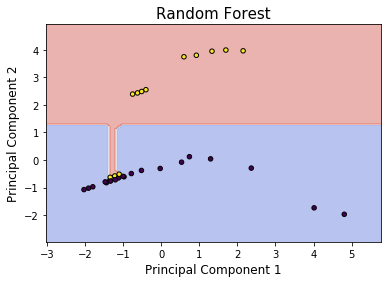

Predicting Optimised
Using PCA and Random Forest Classifier to visualize decision boundary in 2D and test accuracy
[[15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



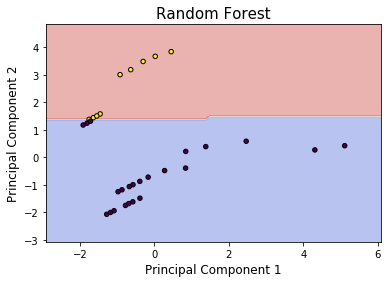

In [16]:
labels = df.drop(['TestId', 'Build', 'Time (ms)', 'PeakMemory (MB)'], axis = 1).columns
for i in labels:
    print("Predicting", i)
    X = df.drop(['TestId',i], axis = 1)
    Y = df[i]

    X = pd.get_dummies(X, prefix_sep='_')
    Y = LabelEncoder().fit_transform(Y)

    X2 = StandardScaler().fit_transform(X.values)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X2)
    PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
    PCA_df = pd.concat([PCA_df, df['Optimised']], axis = 1)
    PCA_df['Optimised'] = LabelEncoder().fit_transform(PCA_df['Optimised'])
    
    print("Using PCA and Random Forest Classifier to visualize decision boundary in 2D and test accuracy")
    X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Reduced,Y_Reduced)
    predictionforest = trainedforest.predict(X_Test_Reduced)
    print(confusion_matrix(Y_Test_Reduced,predictionforest))
    print(classification_report(Y_Test_Reduced,predictionforest))
    x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
    y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = trainedforest.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
    plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
    plt.xlabel('Principal Component 1', fontsize = 12)
    plt.ylabel('Principal Component 2', fontsize = 12)
    plt.title('Random Forest', fontsize = 15)
    plt.show()

- As can be seen from the outputs shown above, satisfactory results have been obtained in most of the cases. 

## Further Developments

- Some additional implementations can be added in order to improve the overall workflow for this exercise, some examples are: <br>

    1. [Hyperparameters Optimization](https://towardsdatascience.com/hyperparameters-optimization-526348bb8e2d)
    2. [Online Interactive Dashboard](https://towardsdatascience.com/interactive-dashboards-for-data-science-51aa038279e5) (A Demo live Application is available on my personal website at this [link](https://salty-tor-65518.herokuapp.com/))
    3. [Advanced Feature Extraction Techniques](https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be)
    4. [Advanced Feature Selection](https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784)

    For each of these topics, I provided links to relevant articles/projects I did concerning them.

    Additionally, some of my Data Science/Machine Learning project are available to be seen on my personal [GitHub](https://github.com/pierpaolo28) and [Kaggle](https://www.kaggle.com/pierpaolo28) accounts.

    I hope you enjoyed going through this notebook, if you have any question please do not hesitate to [get in touch with me](https://www.linkedin.com/in/pierpaolo28)!